In [ ]:
!pip install datasets
!pip install pydub

!pip install git+https://github.com/huggingface/transformers.git
!pip install huggingface-hub

In [ ]:
import os
import librosa

import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Loading Training dataset

In [ ]:
# creating the dataframe which has path to wav file and it's label

label = []
path = []

root = '/content/drive/MyDrive/Archive/Bird/dataset/whole_dataset/train_val/train_data'
for species in os.listdir(root):
    species_folder = root + '/' + species
    for audio in os.listdir(species_folder):
        audio_path = species_folder + '/' + audio
        path.append(audio_path)
        label.append(species)

df_train = pd.DataFrame({'path': path,
                         'class_name': label})
print(df_train.shape)
df_train.sample(5)

(974, 2)


,path,class_name
420,/content/drive/MyDrive/Archive/Bird/dataset/wh...,sparrow
890,/content/drive/MyDrive/Archive/Bird/dataset/wh...,owl
547,/content/drive/MyDrive/Archive/Bird/dataset/wh...,bluejay
436,/content/drive/MyDrive/Archive/Bird/dataset/wh...,sparrow
759,/content/drive/MyDrive/Archive/Bird/dataset/wh...,woodpeewe


In [ ]:
# adding numerical class labels to each audio files

cls_label = {'Asiankoel' : 0, 'bluejay': 1, 'crow': 2, 'duck': 3, 'goaway': 4, 'lapwing': 5, 'owl': 6,
       'peafowl' : 7, 'sparrow':8, 'woodpeewe':9}

def name_to_label(x):
  cls_name = x['class_name']
  return cls_label[cls_name]

df_train['class_label'] = df_train.apply(name_to_label, axis=1)
df_train.sample(5)

,path,class_name,class_label
860,/content/drive/MyDrive/Archive/Bird/dataset/wh...,lapwing,5
766,/content/drive/MyDrive/Archive/Bird/dataset/wh...,woodpeewe,9
184,/content/drive/MyDrive/Archive/Bird/dataset/wh...,duck,3
827,/content/drive/MyDrive/Archive/Bird/dataset/wh...,lapwing,5
737,/content/drive/MyDrive/Archive/Bird/dataset/wh...,woodpeewe,9


In [ ]:
# adding wav form audio
def get_audio(x):
  path = x['path']
  y, sr = librosa.load(path)
  return y


df_train['audio'] = df_train.apply(get_audio, axis=1)
df_train.sample(2)

,path,class_name,class_label,audio
812,/content/drive/MyDrive/Archive/Bird/dataset/wh...,lapwing,5,"[-1.6829725e-05, 0.000115752875, -2.9696472e-0..."
967,/content/drive/MyDrive/Archive/Bird/dataset/wh...,owl,6,"[-9.696664e-06, 4.8056318e-06, 5.408855e-06, -..."


Loading Validation dataset

In [ ]:
# creating the dataframe which has path to wav file and it's label

label = []
path = []

root = '/content/drive/MyDrive/Archive/Bird/dataset/whole_dataset/train_val/validation_data'
for species in os.listdir(root):
    species_folder = root + '/' + species
    for audio in os.listdir(species_folder):
        audio_path = species_folder + '/' + audio
        path.append(audio_path)
        label.append(species)

df_test = pd.DataFrame({'path': path,
                         'class_name': label})
print(df_test.shape)
df_test.sample(5)

(104, 2)


,path,class_name
76,/content/drive/MyDrive/Archive/Bird/dataset/wh...,lapwing
51,/content/drive/MyDrive/Archive/Bird/dataset/wh...,Asiankoel
12,/content/drive/MyDrive/Archive/Bird/dataset/wh...,woodpeewe
55,/content/drive/MyDrive/Archive/Bird/dataset/wh...,Asiankoel
27,/content/drive/MyDrive/Archive/Bird/dataset/wh...,goaway


In [ ]:
# adding numerical class labels to each audio files

cls_label = {'Asiankoel' : 0, 'bluejay': 1, 'crow': 2, 'duck': 3, 'goaway': 4, 'lapwing': 5, 'owl': 6,
       'peafowl' : 7, 'sparrow':8, 'woodpeewe':9}

def name_to_label(x):
  cls_name = x['class_name']
  return cls_label[cls_name]

df_test['class_label'] = df_test.apply(name_to_label, axis=1)
df_test.sample(5)

,path,class_name,class_label
100,/content/drive/MyDrive/Archive/Bird/dataset/wh...,crow,2
10,/content/drive/MyDrive/Archive/Bird/dataset/wh...,woodpeewe,9
44,/content/drive/MyDrive/Archive/Bird/dataset/wh...,duck,3
102,/content/drive/MyDrive/Archive/Bird/dataset/wh...,crow,2
65,/content/drive/MyDrive/Archive/Bird/dataset/wh...,bluejay,1


In [ ]:
# adding wav form audio
def get_audio(x):
  path = x['path']
  y, sr = librosa.load(path)
  return y


df_test['audio'] = df_test.apply(get_audio, axis=1)
df_test.sample(2)

,path,class_name,class_label,audio
28,/content/drive/MyDrive/Archive/Bird/dataset/wh...,goaway,4,"[-2.3305227e-05, -3.907024e-05, 4.995904e-05, ..."
2,/content/drive/MyDrive/Archive/Bird/dataset/wh...,owl,6,"[-3.7035188e-05, -2.0944437e-05, 3.070797e-05,..."


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   path         104 non-null    object
 1   class_name   104 non-null    object
 2   class_label  104 non-null    int64 
 3   audio        104 non-null    object
dtypes: int64(1), object(3)
memory usage: 3.4+ KB


Creating dataset from train and test dataframes

In [ ]:
from datasets import Dataset, DatasetDict


df_test = df_test.iloc[:96]
df_train = df_train.iloc[:960]

train_ds = Dataset.from_pandas(df_train)
test_ds = Dataset.from_pandas(df_test)

dataset = DatasetDict()

dataset['train'] = train_ds
dataset['test'] = test_ds

print(dataset)

DatasetDict({
    train: Dataset({
        features: ['path', 'class_name', 'class_label', 'audio'],
        num_rows: 960
    })
    test: Dataset({
        features: ['path', 'class_name', 'class_label', 'audio'],
        num_rows: 96
    })
})


Modelling

In [ ]:
tf.keras.backend.clear_session()

# Maximum duration of the input audio file we feed to our Wav2Vec 2.0 model.
MAX_DURATION = 1
# Sampling rate is the number of samples of audio recorded every second
SAMPLING_RATE = 16000
BATCH_SIZE = 1  # Batch-size for training and evaluating our model.
NUM_CLASSES = 10  # Number of classes our dataset will have (11 in our case).
HIDDEN_DIM = 768  # Dimension of our model output (768 in case of Wav2Vec 2.0 - Base).
MAX_SEQ_LENGTH = MAX_DURATION * SAMPLING_RATE  # Maximum length of the input audio file.
# Wav2Vec 2.0 results in an output frequency with a stride of about 20ms.
MAX_FRAMES = 49
MAX_EPOCHS = 2  # Maximum number of training epochs.

MODEL_CHECKPOINT = "facebook/wav2vec2-base"  # Name of pretrained model from Hugging Face

In [ ]:
from transformers import AutoFeatureExtractor

feature_extractor = AutoFeatureExtractor.from_pretrained(
    MODEL_CHECKPOINT, return_attention_mask=True
)


def preprocess_function(examples):
    audio_arrays = examples["audio"]
    inputs = feature_extractor(
        audio_arrays,
        sampling_rate=feature_extractor.sampling_rate,
        max_length=MAX_SEQ_LENGTH,
        truncation=True,
        padding=True,
    )
    return inputs


# This line with pre-process our speech_commands_v1 dataset. We also remove the "audio"
# and "file" columns as they will be of no use to us while training.
processed_dataset = dataset.map(
    preprocess_function, remove_columns=["audio", "path", "class_name"], batched=True
)

# Load the whole dataset splits as a dict of numpy arrays
train = processed_dataset["train"].shuffle(seed=42).with_format("numpy")[:]
test = processed_dataset["test"].shuffle(seed=42).with_format("numpy")[:]

Map:   0%|          | 0/960 [00:00<?, ? examples/s]

Map:   0%|          | 0/96 [00:00<?, ? examples/s]

In [ ]:
from transformers import TFWav2Vec2Model


def mean_pool(hidden_states, feature_lengths):
    attenion_mask = tf.sequence_mask(
        feature_lengths, maxlen=MAX_FRAMES, dtype=tf.dtypes.int64
    )
    padding_mask = tf.cast(
        tf.reverse(tf.cumsum(tf.reverse(attenion_mask, [-1]), -1), [-1]),
        dtype=tf.dtypes.bool,
    )
    hidden_states = tf.where(
        tf.broadcast_to(
            tf.expand_dims(~padding_mask, -1), (BATCH_SIZE, MAX_FRAMES, HIDDEN_DIM)
        ),
        0.0,
        hidden_states,
    )
    pooled_state = tf.math.reduce_sum(hidden_states, axis=1) / tf.reshape(
        tf.math.reduce_sum(tf.cast(padding_mask, dtype=tf.dtypes.float32), axis=1),
        [-1, 1],
    )
    return pooled_state


class TFWav2Vec2ForAudioClassification(layers.Layer):
    """Combines the encoder and decoder into an end-to-end model for training."""

    def __init__(self, model_checkpoint, num_classes):
        super(TFWav2Vec2ForAudioClassification, self).__init__()
        # Instantiate the Wav2Vec 2.0 model without the Classification-Head
        self.wav2vec2 = TFWav2Vec2Model.from_pretrained(
            model_checkpoint, apply_spec_augment=False, from_pt=True
        )
        self.pooling = layers.GlobalAveragePooling1D()
        # Drop-out layer before the final Classification-Head
        self.dense1 = layers.Dense(1024, activation = 'relu')
        self.dense2 = layers.Dense(512, activation = 'relu')
        self.dense3 = layers.Dense(256, activation = 'relu')
        # Classification-Head
        self.final_layer = layers.Dense(num_classes, activation="sigmoid")

    def call(self, inputs):
        # We take only the first output in the returned dictionary corresponding to the
        # output of the last layer of Wav2vec 2.0
        hidden_states = self.wav2vec2(inputs["input_values"])[0]

        # If attention mask does exist then mean-pool only un-masked output frames
        if tf.is_tensor(inputs["attention_mask"]):
            # Get the length of each audio input by summing up the attention_mask
            # (attention_mask = (BATCH_SIZE x MAX_SEQ_LENGTH) ∈ {1,0})
            audio_lengths = tf.cumsum(inputs["attention_mask"], -1)[:, -1]
            # Get the number of Wav2Vec 2.0 output frames for each corresponding audio input
            # length
            feature_lengths = self.wav2vec2.wav2vec2._get_feat_extract_output_lengths(
                audio_lengths
            )
            pooled_state = mean_pool(hidden_states, feature_lengths)
        # If attention mask does not exist then mean-pool only all output frames
        else:
            pooled_state = self.pooling(hidden_states)

        d1 = self.dense1(pooled_state)
        d2 = self.dense2(d1)
        d3 = self.dense3(d2)
        final_state = self.final_layer(d3)
        return final_state

In [ ]:
def build_model():
    # Model's input
    inputs = {
        "input_values": tf.keras.Input(shape=(MAX_SEQ_LENGTH,), dtype="float32"),
        "attention_mask": tf.keras.Input(shape=(MAX_SEQ_LENGTH,), dtype="int32"),
    }
    # Instantiate the Wav2Vec 2.0 model with Classification-Head using the desired
    # pre-trained checkpoint
    wav2vec2_model = TFWav2Vec2ForAudioClassification(MODEL_CHECKPOINT, NUM_CLASSES)(inputs)
    # Model
    model = tf.keras.Model(inputs, wav2vec2_model)
    # Loss
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True)
    # Optimizer
    optimizer = keras.optimizers.Adam(learning_rate=1e-5)
    # Compile and return
    model.compile(loss=loss, optimizer=optimizer, metrics=["accuracy"])
    return model


model = build_model()


TFWav2Vec2Model has backpropagation operations that are NOT supported on CPU. If you wish to train/fine-tine this model, you need a GPU or a TPU
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFWav2Vec2Model: ['quantizer.weight_proj.bias', 'project_q.bias', 'quantizer.codevectors', 'quantizer.weight_proj.weight', 'project_hid.bias', 'project_q.weight', 'project_hid.weight']
- This IS expected if you are initializing TFWav2Vec2Model from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFWav2Vec2Model from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFWav2Vec2Model were initialized from the PyTorch model.
If your task is similar to the task the model of the che

In [ ]:

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 16000)]      0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None, 16000)]      0           []                               
                                                                                                  
 tf_wav2_vec2_for_audio_classif  (None, 10)          95817866    ['input_2[0][0]',                
 ication (TFWav2Vec2ForAudioCla                                   'input_1[0][0]']                
 ssification)                                                                                     
                                                                                              

In [ ]:
# Remove targets from training dictionaries
train_x = {x: y for x, y in train.items() if x != "class_label"}
test_x = {x: y for x, y in test.items() if x != "class_label"}

In [ ]:
history = model.fit(
    train_x,
    train["class_label"],
    validation_data=(test_x, test["class_label"]),
    batch_size=1,
    epochs=50,
)

Epoch 1/50


960/960 [==============================] - 124s 75ms/step - loss: 1.6577 - accuracy: 0.4875 - val_loss: 1.0327 - val_accuracy: 0.6771
Epoch 2/50
960/960 [==============================] - 68s 71ms/step - loss: 0.5905 - accuracy: 0.8208 - val_loss: 0.2993 - val_accuracy: 0.9062
Epoch 3/50
960/960 [==============================] - 67s 70ms/step - loss: 0.4439 - accuracy: 0.8698 - val_loss: 0.2108 - val_accuracy: 0.9583
Epoch 4/50
960/960 [==============================] - 68s 71ms/step - loss: 0.3203 - accuracy: 0.9042 - val_loss: 0.2357 - val_accuracy: 0.9375
Epoch 5/50
960/960 [==============================] - 68s 71ms/step - loss: 0.2698 - accuracy: 0.9177 - val_loss: 0.4440 - val_accuracy: 0.8750
Epoch 6/50
960/960 [==============================] - 69s 72ms/step - loss: 0.2561 - accuracy: 0.9146 - val_loss: 0.3628 - val_accuracy: 0.9062
Epoch 7/50
960/960 [==============================] - 68s 71ms/step - loss: 0.2166 - accuracy: 0.9302 - val_loss: 0.2858 - val_accuracy: 0.9167
Ep

In [ ]:
import matplotlib.pyplot as plt

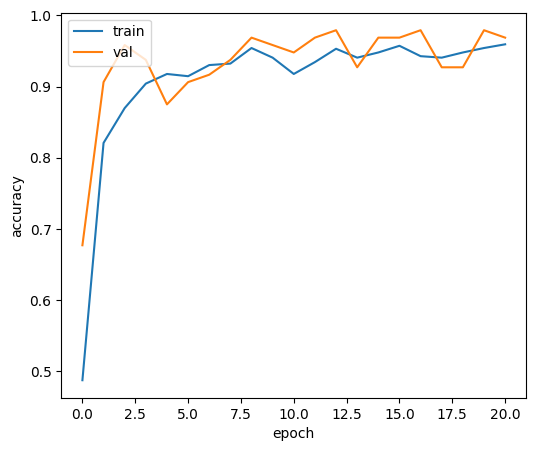

In [ ]:
plt.figure(figsize=(6, 5)) # width, height (inches)
plt.plot(history.history['accuracy'][:21])
plt.plot(history.history['val_accuracy'][:21])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

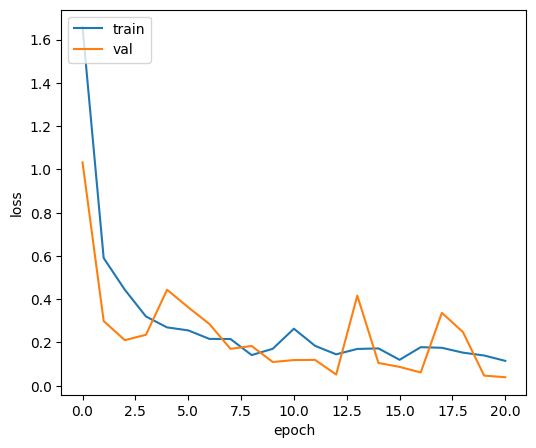

In [ ]:
plt.figure(figsize=(6, 5)) # width, height (inches)
plt.plot(history.history['loss'][:21])
plt.plot(history.history['val_loss'][:21])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#### Prediction

In [ ]:
!pip install pydub

import os
from multiprocessing import Pool

import pandas as pd
import numpy as np

from sklearn.metrics import f1_score
from scipy.sparse import lil_matrix

import tensorflow as tf
from tqdm import tqdm

import librosa
from pydub import AudioSegment
from pydub.utils import make_chunks
from IPython.display import Audio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#assigning numerical class labels to each bird species

cls_label = {'Asiankoel' : 0, 'bluejay': 1, 'crow': 2, 'duck': 3, 'goaway': 4, 'lapwing': 5, 'owl': 6,
             'peafowl' : 7, 'sparrow':8, 'woodpeewe':9}

########################################################

def get_class_labels(r):
  x = r['class_name']
  label_names = x.split('_')

  label_nums=[]
  for l in label_names:
    indx = cls_label[l]
    label_nums.append(indx)

  return label_nums

In [ ]:
# creating the dataframe which has path to wav file and it's label
# 2 species test dataset
label = []
path = []

root = '/content/drive/MyDrive/Bird/dataset/whole_dataset/mix_2'
for species in os.listdir(root):
    species_folder = root + '/' + species
    for audio in os.listdir(species_folder):
        audio_path = species_folder + '/' + audio
        path.append(audio_path)
        label.append(species)

df_mix_2 = pd.DataFrame({'path': path,
                         'class_name': label})

df_mix_2['class_label'] = df_mix_2.apply(get_class_labels, axis=1)

print(df_mix_2.shape)
df_mix_2.sample(5)

(334, 3)


,path,class_name,class_label
57,/content/drive/MyDrive/Bird/dataset/whole_data...,Asiankoel_duck,"[0, 3]"
194,/content/drive/MyDrive/Bird/dataset/whole_data...,woodpeewe_sparrow,"[9, 8]"
143,/content/drive/MyDrive/Bird/dataset/whole_data...,lapwing_bluejay,"[5, 1]"
34,/content/drive/MyDrive/Bird/dataset/whole_data...,Asiankoel_crow,"[0, 2]"
32,/content/drive/MyDrive/Bird/dataset/whole_data...,sparrow_duck,"[8, 3]"


In [ ]:
# 3 species test dataset
label = []
path = []

root = '/content/drive/MyDrive/Bird/dataset/whole_dataset/mix_3'
for species in os.listdir(root):
    species_folder = root + '/' + species
    for audio in os.listdir(species_folder):
        audio_path = species_folder + '/' + audio
        path.append(audio_path)
        label.append(species)

df_mix_3 = pd.DataFrame({'path': path,
                         'class_name': label})

df_mix_3['class_label'] = df_mix_3.apply(get_class_labels, axis=1)

print(df_mix_3.shape)
df_mix_3.sample(5)

(100, 3)


,path,class_name,class_label
16,/content/drive/MyDrive/Bird/dataset/whole_data...,bluejay_woodpeewe_crow,"[1, 9, 2]"
29,/content/drive/MyDrive/Bird/dataset/whole_data...,crow_sparrow_bluejay,"[2, 8, 1]"
15,/content/drive/MyDrive/Bird/dataset/whole_data...,bluejay_woodpeewe_crow,"[1, 9, 2]"
51,/content/drive/MyDrive/Bird/dataset/whole_data...,bluejay_sparrow_duck,"[1, 8, 3]"
76,/content/drive/MyDrive/Bird/dataset/whole_data...,bluejay_sparrow_goaway,"[1, 8, 4]"


In [ ]:
# whole test data i.e mixture of both 2 and 3 species audio files
df = pd.concat([df_mix_2, df_mix_3], ignore_index = True)
df.sample(5)

,path,class_name,class_label
119,/content/drive/MyDrive/Bird/dataset/whole_data...,duck_goaway,"[3, 4]"
15,/content/drive/MyDrive/Bird/dataset/whole_data...,owl_sparrow,"[6, 8]"
334,/content/drive/MyDrive/Bird/dataset/whole_data...,goaway_sparrow_bluejay,"[4, 8, 1]"
256,/content/drive/MyDrive/Bird/dataset/whole_data...,woodpeewe_lapwing,"[9, 5]"
282,/content/drive/MyDrive/Bird/dataset/whole_data...,sparrow_goaway,"[8, 4]"


In [ ]:
# ref: https://www.kaggle.com/code/arailly/multi-label-f-beta-score/notebook

def label_to_sm(labels, n_classes):
    sm = lil_matrix((len(labels), n_classes))
    for i, label in enumerate(labels):
        sm[i, label] = 1  #eg: sm[0, [2,3]] = 1
    return sm

###############################################

def get_f1_score(y_true, y_pred):
  y_true_sm = label_to_sm(labels=y_true, n_classes=10)
  y_pred_sm = label_to_sm(labels=y_pred, n_classes=10)
  metric = f1_score(y_true=y_true_sm, y_pred=y_pred_sm, average='weighted')
  return metric

#################################################

def get_sm(y_true, y_pred):
  y_true_sm = label_to_sm(labels=y_true, n_classes=10)
  y_pred_sm = label_to_sm(labels=y_pred, n_classes=10)
  return y_true_sm, y_pred_sm

In [ ]:
def get_split(path):
  myaudio = AudioSegment.from_file(path , "wav")
  chunk_length_ms = 1000 # pydub calculates in millisec
  chunks = make_chunks(myaudio, chunk_length_ms) #Make chunks of one sec

  #Export all of the individual chunks as wav files
  paths =[]

  for i, chunk in enumerate(chunks):
      chunk_name = "chunk{0}.wav".format(i)
      paths.append(chunk_name)
      chunk.export(chunk_name, format="wav")

  return paths

##################################################

def get_feature(path):
    y, sr = librosa.load(path)

    audio_arrays = [y]
    inputs = feature_extractor(
        audio_arrays,
        sampling_rate=feature_extractor.sampling_rate,
        max_length=MAX_SEQ_LENGTH,
        truncation=True,
        padding=True,
    )
    a = inputs['input_values'][0]
    a = a.reshape((1,16000))
    b = inputs['attention_mask'][0]
    b = b.reshape((1,16000))

    xq = {'input_values': a, 'attention_mask': b}

    return xq
##################################################

def get_xqs(paths):
  xqs = []
  for i in range(8): #only using first 6 chunks
    t = get_feature(paths[i])
    xqs.append(t)
  return xqs


In [ ]:
def get_probs(model, xqs):
  probs = []
  for xq in xqs:
    p = model.predict(xq, verbose = 0)
    probs.append(p)
  return np.array(probs)

def predict(model, xqs, num_species):
  probs = get_probs(model, xqs)
  # aggregrate
  s = np.max(probs, axis = 0)
  if num_species == 2:
    n = 2
  else:
    n = 3
  labels = np.argsort(s[0])[::-1][:n]
  return list(labels)

In [ ]:
def test(model, df, num_species):
  y_true = list(df['class_label'])
  y_pred = []
  for i in tqdm(range(len(df))):
    path = df['path'][i]
    chunk_paths = get_split(path)
    xqs = get_xqs(chunk_paths)
    label = predict(model, xqs, num_species)
    y_pred.append(label)
  return y_true, y_pred

#########################################################

def evaluate(model, df_mix_2, df_mix_3):
  y_true_2, y_pred_2 = test(model, df_mix_2, 2)
  y_true_3, y_pred_3 = test(model, df_mix_3, 3)

  y_true = y_true_2 + y_true_3
  y_pred = y_pred_2 + y_pred_3
  score = get_f1_score(y_true, y_pred)

  return y_true, y_pred, score

In [ ]:
y_true, y_pred, score = evaluate(model, df_mix_2, df_mix_3)
score

100%|██████████| 100/100 [01:52<00:00,  1.12s/it]


0.8289575099438417

In [ ]:
from sklearn.metrics import classification_report

y_true, y_pred = get_sm(y_true, y_pred)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.99      0.80        69
           1       0.83      0.75      0.79       101
           2       0.79      0.92      0.85       100
           3       0.90      0.72      0.80        88
           4       0.81      1.00      0.90       145
           5       1.00      0.86      0.92       136
           6       0.95      0.38      0.55        55
           7       0.54      0.62      0.58        63
           8       0.90      0.82      0.85       119
           9       0.98      0.96      0.97        92

   micro avg       0.83      0.83      0.83       968
   macro avg       0.84      0.80      0.80       968
weighted avg       0.85      0.83      0.83       968
 samples avg       0.84      0.84      0.84       968

